### 1.参数获取

In [1]:
import json

# 打开json文件 获取参数
with open('config.json', 'r') as f:
    config = json.load(f)
    print("config get success !")

# 读取参数
market_config = config['market_config']
grid_config = config['grid_config']

# 打印参数
print(market_config.keys())
print(grid_config.keys())


config get success !
dict_keys(['url', 'api_key', 'currency', 'code', 'start', 'end'])
dict_keys(['lower_bound', 'upper_bound', 'num_grids', 'leverage', 'investment', 'mode'])


### 2.数据获取

In [2]:
from src.market_data import MarketData

market_data = MarketData(market_config)
prices, timestamps = market_data.fetch_real_data()

print("Prices:", prices[:5])
print("Timestamps:", timestamps[:5])

Prices: [59139.545703792886, 59701.79742106999, 60795.508674910496, 60505.67392716708, 61216.127592476456]
Timestamps: [1724199000000, 1724251800000, 1724304600000, 1724357400000, 1724410200000]


### 3.网格策略

网格价格 [53000.0, 53254.14284271017, 53509.50433795809, 53766.09032936302, 54023.90668856521, 54282.95931536032, 54543.254137834396, 54804.797112499546, 55067.5942244302, 55331.65148740014, 55596.974944020076, 55863.57066587591, 56131.44475366773, 56400.60333734935, 56671.052576268645, 56942.79865930846, 57215.847805028265, 57490.20626180642, 57765.88030798321, 58042.87625200446, 58321.20043256596, 58600.85921875844, 58881.859010213426, 59164.20623724956, 59447.90736101985, 59732.96887365948, 60019.39729843438, 60307.19918989052, 60596.38113400387, 60886.94974833112, 61178.91168216117, 61472.27361666718, 61767.04226505959, 62063.22437273962, 62360.82671745371, 62659.85610944862, 62960.31939162722, 63262.223439705114, 63565.575162368, 63870.38150142972, 64176.64943199115, 64484.385962599845, 64793.59813541031, 65104.29302634529, 65416.47774525758, 65730.15943609278, 66045.34527705282, 66362.0424807601, 66680.2582944226, 66999.99999999983]
交易策略 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

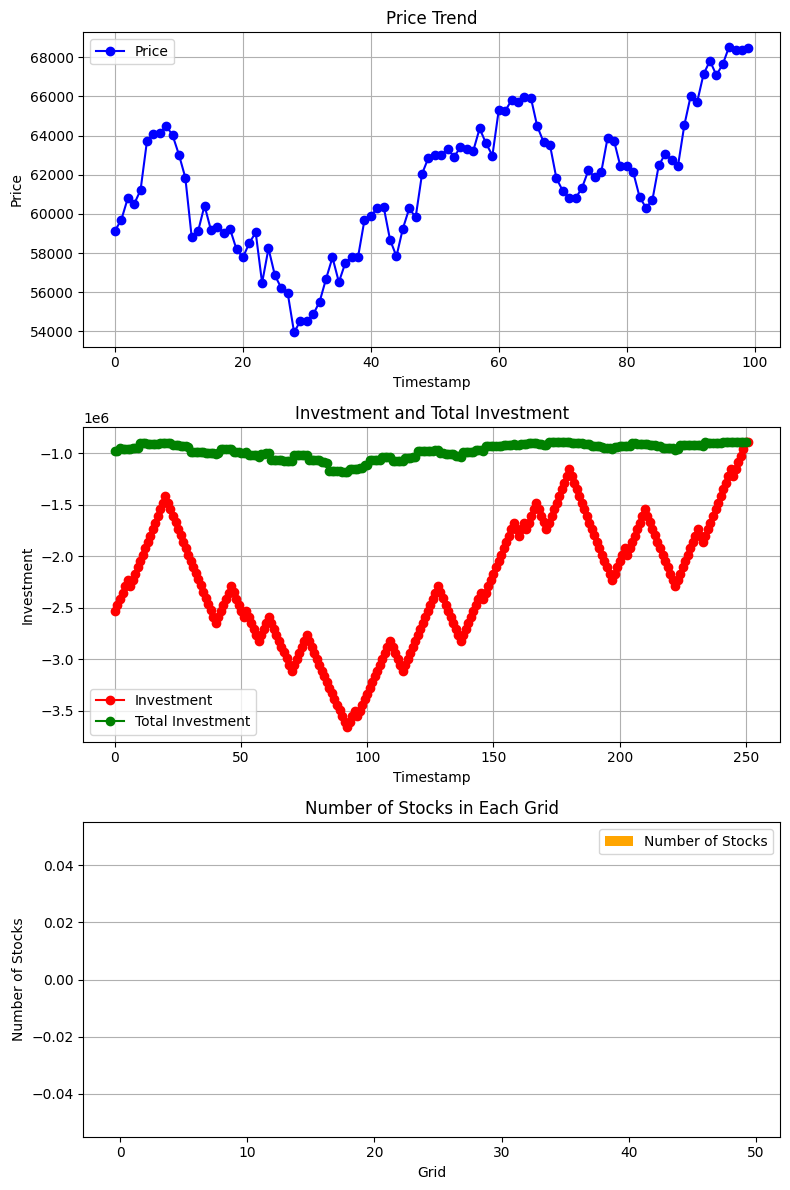

In [5]:
from src.grid_calculator import GridCalculator

grid_calc = GridCalculator(grid_config, prices)
grid_calc.generate_grid()

print("开始交易")
grid_calc.run(print_info=False)

grid_calc.conclusion()

### 4.可视化模型